# Voorspelling Recreatie


In [238]:
#importeren van functies
from Helper_functions import *
import seaborn as sb
#inladen van data dmv csv
df_recreatie_lr = pd.read_csv('../../raw-data/recreatie.csv', index_col=0)

df_recreatie_lr = df_recreatie_lr.drop(columns=['geometry'])
#showen data
df_recreatie_lr

,postcode,gemeente,aantal_woningen,aantal_woningen_genormaliseerd,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_voor_1945_genormaliseerd,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_45_tot_65_genormaliseerd,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_65_tot_75_genormaliseerd,...,hotel_aantal_binnen_10_km,hotel_aantal_binnen_10_km_genormaliseerd,hotel_aantal_binnen_20_km,hotel_aantal_binnen_20_km_genormaliseerd,treinstation_gemiddelde_afstand_in_km,treinstation_gemiddelde_afstand_in_km_genormaliseerd,overstapstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km_genormaliseerd,brandweerkazerne_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km_genormaliseerd
0,1011,Amsterdam,6110.0,0.476209,3605.0,0.405405,115.0,0.021359,115.0,0.017614,...,400.0,0.984737,464.4,0.947541,1.2,0.013652,1.2,0.009818,0.7,0.027027
1,1012,Amsterdam,5695.0,0.443838,4725.0,0.531532,20.0,0.002913,50.0,0.007206,...,400.2,0.985229,469.9,0.958811,0.8,0.006826,0.8,0.004208,1.3,0.081081
2,1013,Amsterdam,12825.0,1.000000,6930.0,0.779842,75.0,0.013592,115.0,0.017614,...,398.9,0.982029,467.7,0.954303,1.7,0.022184,1.7,0.016830,2.0,0.144144
3,1014,Amsterdam,270.0,0.020671,20.0,0.001689,5.0,0.000000,5.0,0.000000,...,400.1,0.984983,470.6,0.960246,1.7,0.022184,1.7,0.016830,1.6,0.108108
4,1015,Amsterdam,9865.0,0.769111,7275.0,0.818694,100.0,0.018447,235.0,0.036829,...,400.5,0.985968,473.5,0.966189,1.3,0.015358,1.3,0.011220,1.0,0.054054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,9999,Venlo,45.0,0.003120,30.0,0.002815,NaN,NaN,NaN,NaN,...,3.6,0.008863,28.5,0.054303,6.5,0.104096,19.6,0.267882,6.1,0.513514
4201,9999,Staphorst,45.0,0.003120,30.0,0.002815,NaN,NaN,NaN,NaN,...,3.6,0.008863,28.5,0.054303,6.5,0.104096,19.6,0.267882,6.1,0.513514
4202,9999,Horst aan de Maas,45.0,0.003120,30.0,0.002815,NaN,NaN,NaN,NaN,...,3.6,0.008863,28.5,0.054303,6.5,0.104096,19.6,0.267882,6.1,0.513514
4203,9999,Voorschoten,45.0,0.003120,30.0,0.002815,NaN,NaN,NaN,NaN,...,3.6,0.008863,28.5,0.054303,6.5,0.104096,19.6,0.267882,6.1,0.513514


In [239]:
lijst = df_recreatie_lr[['aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later',
       'gemiddelde_woz_waarde_woning',
       'percentage_koopwoningen',
       'percentage_huurwoningen',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km',
       'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km',
       'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km',
       'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km',
       'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km',
       'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km',
       'hotel_aantal_binnen_5_km', 
       'hotel_aantal_binnen_10_km',
       'hotel_aantal_binnen_20_km', 
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km']]

#alle objecttypes omzetten naar float
for x in lijst:
    df_recreatie_lr[[x]] = df_recreatie_lr[[x]].astype('float')


df_recreatie_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4205 entries, 0 to 4204
Data columns (total 90 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   postcode                                                     4205 non-null   int64  
 1   gemeente                                                     4091 non-null   object 
 2   aantal_woningen                                              4169 non-null   float64
 3   aantal_woningen_genormaliseerd                               4169 non-null   float64
 4   aantal_woningen_bouwjaar_voor_1945                           3770 non-null   float64
 5   aantal_woningen_bouwjaar_voor_1945_genormaliseerd            3770 non-null   float64
 6   aantal_woningen_bouwjaar_45_tot_65                           3541 non-null   float64
 7   aantal_woningen_bouwjaar_45_tot_65_genormaliseerd            3541 non-null   f

In [240]:
lijst_to_drop = lijst

#dataframe voor alle genormaliseerde waardes in 1 tabel
df_recreatie_lr_genormaliseerd = df_recreatie_lr.drop(columns=lijst_to_drop)

#dataframe voor alle waardes zonder genormaliseerde waardes
df_recreatie_lr_zonder_genormaliseerd = lijst

df_recreatie_lr_zonder_genormaliseerd = pd.merge(df_recreatie_lr[['postcode', 'gemeente']], lijst, left_index=True, right_index=True)


In [241]:
df_recreatie_lr_genormaliseerd

,postcode,gemeente,aantal_woningen_genormaliseerd,aantal_woningen_bouwjaar_voor_1945_genormaliseerd,aantal_woningen_bouwjaar_45_tot_65_genormaliseerd,aantal_woningen_bouwjaar_65_tot_75_genormaliseerd,aantal_woningen_bouwjaar_75_tot_85_genormaliseerd,aantal_woningen_bouwjaar_85_tot_95_genormaliseerd,aantal_woningen_bouwjaar_95_tot_05_genormaliseerd,aantal_woningen_bouwjaar_05_tot_15_genormaliseerd,...,restaurant_gemiddelde_afstand_in_km_genormaliseerd,restaurant_aantal_binnen_1_km_genormaliseerd,restaurant_aantal_binnen_5_km_genormaliseerd,hotel_gemiddelde_afstand_in_km_genormaliseerd,hotel_aantal_binnen_5_km_genormaliseerd,hotel_aantal_binnen_10_km_genormaliseerd,hotel_aantal_binnen_20_km_genormaliseerd,treinstation_gemiddelde_afstand_in_km_genormaliseerd,overstapstation_gemiddelde_afstand_in_km_genormaliseerd,brandweerkazerne_gemiddelde_afstand_in_km_genormaliseerd
0,1011,Amsterdam,0.476209,0.405405,0.021359,0.017614,0.130435,0.082353,0.127030,0.062393,...,0.009804,0.571246,0.969008,0.006579,0.952784,0.984737,0.947541,0.013652,0.009818,0.027027
1,1012,Amsterdam,0.443838,0.531532,0.002913,0.007206,0.013126,0.103743,0.042025,0.017094,...,0.000000,1.000000,0.980658,0.000000,0.967522,0.985229,0.958811,0.006826,0.004208,0.081081
2,1013,Amsterdam,1.000000,0.779842,0.013592,0.017614,0.265792,0.314439,0.084050,0.341880,...,0.019608,0.209585,0.852397,0.032895,0.922489,0.982029,0.954303,0.022184,0.016830,0.144144
3,1014,Amsterdam,0.020671,0.001689,0.000000,0.000000,0.000000,0.003209,0.034384,NaN,...,0.049020,0.032268,0.605686,0.019737,0.669760,0.984983,0.960246,0.022184,0.016830,0.108108
4,1015,Amsterdam,0.769111,0.818694,0.018447,0.036829,0.123052,0.228877,0.063992,0.012821,...,0.009804,0.608307,0.970401,0.013158,0.981987,0.985968,0.966189,0.015358,0.011220,0.054054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,9999,Venlo,0.003120,0.002815,NaN,NaN,NaN,NaN,NaN,NaN,...,0.431373,0.000000,0.000948,0.348684,0.000273,0.008863,0.054303,0.104096,0.267882,0.513514
4201,9999,Staphorst,0.003120,0.002815,NaN,NaN,NaN,NaN,NaN,NaN,...,0.431373,0.000000,0.000948,0.348684,0.000273,0.008863,0.054303,0.104096,0.267882,0.513514
4202,9999,Horst aan de Maas,0.003120,0.002815,NaN,NaN,NaN,NaN,NaN,NaN,...,0.431373,0.000000,0.000948,0.348684,0.000273,0.008863,0.054303,0.104096,0.267882,0.513514
4203,9999,Voorschoten,0.003120,0.002815,NaN,NaN,NaN,NaN,NaN,NaN,...,0.431373,0.000000,0.000948,0.348684,0.000273,0.008863,0.054303,0.104096,0.267882,0.513514


In [242]:
df_recreatie_lr_zonder_genormaliseerd

,postcode,gemeente,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,...,restaurant_gemiddelde_afstand_in_km,restaurant_aantal_binnen_1_km,restaurant_aantal_binnen_5_km,hotel_gemiddelde_afstand_in_km,hotel_aantal_binnen_5_km,hotel_aantal_binnen_10_km,hotel_aantal_binnen_20_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km
0,1011,Amsterdam,6110.0,3605.0,115.0,115.0,800.0,390.0,670.0,370.0,...,0.1,178.8,1738.4,0.2,349.1,400.0,464.4,1.2,1.2,0.7
1,1012,Amsterdam,5695.0,4725.0,20.0,50.0,85.0,490.0,225.0,105.0,...,0.0,313.0,1759.3,0.1,354.5,400.2,469.9,0.8,0.8,1.3
2,1013,Amsterdam,12825.0,6930.0,75.0,115.0,1625.0,1475.0,445.0,2005.0,...,0.2,65.6,1529.2,0.6,338.0,398.9,467.7,1.7,1.7,2.0
3,1014,Amsterdam,270.0,20.0,5.0,5.0,5.0,20.0,185.0,NaN,...,0.5,10.1,1086.6,0.4,245.4,400.1,470.6,1.7,1.7,1.6
4,1015,Amsterdam,9865.0,7275.0,100.0,235.0,755.0,1075.0,340.0,80.0,...,0.1,190.4,1740.9,0.3,359.8,400.5,473.5,1.3,1.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,9999,Venlo,45.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,0.0,1.7,5.4,0.1,3.6,28.5,6.5,19.6,6.1
4201,9999,Staphorst,45.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,0.0,1.7,5.4,0.1,3.6,28.5,6.5,19.6,6.1
4202,9999,Horst aan de Maas,45.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,0.0,1.7,5.4,0.1,3.6,28.5,6.5,19.6,6.1
4203,9999,Voorschoten,45.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,0.0,1.7,5.4,0.1,3.6,28.5,6.5,19.6,6.1


In [243]:
df_recreatie_lr.describe()

,postcode,aantal_woningen,aantal_woningen_genormaliseerd,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_voor_1945_genormaliseerd,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_45_tot_65_genormaliseerd,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_65_tot_75_genormaliseerd,aantal_woningen_bouwjaar_75_tot_85,...,hotel_aantal_binnen_10_km,hotel_aantal_binnen_10_km_genormaliseerd,hotel_aantal_binnen_20_km,hotel_aantal_binnen_20_km_genormaliseerd,treinstation_gemiddelde_afstand_in_km,treinstation_gemiddelde_afstand_in_km_genormaliseerd,overstapstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km_genormaliseerd,brandweerkazerne_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km_genormaliseerd
count,4205.000000,4169.000000,4169.000000,3770.000000,3770.000000,3541.000000,3541.000000,3425.000000,3425.000000,3532.000000,...,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,5664.504162,1906.463181,0.148320,397.539788,0.044205,342.335498,0.065502,393.170803,0.062157,334.624858,...,22.343662,0.055007,64.098874,0.127252,7.100240,0.114339,14.296214,0.193495,2.830578,0.218971
std,2678.413406,1950.733386,0.152163,800.392963,0.090134,545.769007,0.105975,617.235524,0.098837,558.214443,...,54.524124,0.134230,88.934491,0.182243,7.165817,0.122284,10.507961,0.147377,1.735142,0.156319
min,1011.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,...,0.000000,0.000000,2.000000,0.000000,0.400000,0.000000,0.500000,0.000000,0.400000,0.000000
25%,3319.000000,285.000000,0.021841,55.000000,0.005631,40.000000,0.006796,40.000000,0.005604,35.000000,...,4.800000,0.011817,22.000000,0.040984,2.400000,0.034130,6.200000,0.079944,1.400000,0.090090
50%,5684.000000,1170.000000,0.090874,140.000000,0.015203,125.000000,0.023301,145.000000,0.022418,125.000000,...,8.500000,0.020926,35.100000,0.067828,5.100000,0.080205,12.100000,0.162693,2.400000,0.180180
75%,8041.000000,3150.000000,0.245320,345.000000,0.038288,410.000000,0.078641,490.000000,0.077662,390.000000,...,17.000000,0.041851,57.500000,0.113730,9.400000,0.153584,20.100000,0.274895,3.800000,0.306306
max,9999.000000,12825.000000,1.000000,8885.000000,1.000000,5155.000000,1.000000,6250.000000,1.000000,6100.000000,...,406.200000,1.000000,490.000000,1.000000,59.000000,1.000000,71.800000,1.000000,11.500000,1.000000


In [244]:
# klasses maken op basis van quantiles van normalisatie waardes
lijst = lijst_to_drop

for x in lijst:
    kolom = df_recreatie_lr[x + "_genormaliseerd"]

    q_25 = kolom.quantile(q=.25)
    q_50 = kolom.quantile(q=.50)
    q_75 = kolom.quantile(q=.75)

    m1 = np.logical_and(kolom < q_25, kolom !=0)
    m2 = np.logical_and(kolom > q_25, kolom < q_50)
    m3 = np.logical_and(kolom > q_50, kolom < q_75)
    m4 = kolom > q_75

    df_recreatie_lr[x + "_klasse"] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')
    df_recreatie_lr = movecol(df_recreatie_lr, cols_to_move=[x + "_klasse"], ref_col=x + '_genormaliseerd', place='After')

df_recreatie_lr

,postcode,gemeente,aantal_woningen,aantal_woningen_genormaliseerd,aantal_woningen_klasse,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_voor_1945_genormaliseerd,aantal_woningen_bouwjaar_voor_1945_klasse,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_45_tot_65_genormaliseerd,...,hotel_aantal_binnen_20_km_klasse,treinstation_gemiddelde_afstand_in_km,treinstation_gemiddelde_afstand_in_km_genormaliseerd,treinstation_gemiddelde_afstand_in_km_klasse,overstapstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km_genormaliseerd,overstapstation_gemiddelde_afstand_in_km_klasse,brandweerkazerne_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km_genormaliseerd,brandweerkazerne_gemiddelde_afstand_in_km_klasse
0,1011,Amsterdam,6110.0,0.476209,Hoog,3605.0,0.405405,Hoog,115.0,0.021359,...,Hoog,1.2,0.013652,Laag,1.2,0.009818,Laag,0.7,0.027027,Laag
1,1012,Amsterdam,5695.0,0.443838,Hoog,4725.0,0.531532,Hoog,20.0,0.002913,...,Hoog,0.8,0.006826,Laag,0.8,0.004208,Laag,1.3,0.081081,Laag
2,1013,Amsterdam,12825.0,1.000000,Hoog,6930.0,0.779842,Hoog,75.0,0.013592,...,Hoog,1.7,0.022184,Laag,1.7,0.016830,Laag,2.0,0.144144,Middel
3,1014,Amsterdam,270.0,0.020671,Laag,20.0,0.001689,Laag,5.0,0.000000,...,Hoog,1.7,0.022184,Laag,1.7,0.016830,Laag,1.6,0.108108,Middel
4,1015,Amsterdam,9865.0,0.769111,Hoog,7275.0,0.818694,Hoog,100.0,0.018447,...,Hoog,1.3,0.015358,Laag,1.3,0.011220,Laag,1.0,0.054054,Laag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,9999,Venlo,45.0,0.003120,Laag,30.0,0.002815,Laag,NaN,NaN,...,Middel,6.5,0.104096,Middel-Hoog,19.6,0.267882,Middel-Hoog,6.1,0.513514,Hoog
4201,9999,Staphorst,45.0,0.003120,Laag,30.0,0.002815,Laag,NaN,NaN,...,Middel,6.5,0.104096,Middel-Hoog,19.6,0.267882,Middel-Hoog,6.1,0.513514,Hoog
4202,9999,Horst aan de Maas,45.0,0.003120,Laag,30.0,0.002815,Laag,NaN,NaN,...,Middel,6.5,0.104096,Middel-Hoog,19.6,0.267882,Middel-Hoog,6.1,0.513514,Hoog
4203,9999,Voorschoten,45.0,0.003120,Laag,30.0,0.002815,Laag,NaN,NaN,...,Middel,6.5,0.104096,Middel-Hoog,19.6,0.267882,Middel-Hoog,6.1,0.513514,Hoog


In [245]:
#data met alle gemiddelde afstanden vanaf een postcode en gemeente.
gemiddelde_afstanden = df_recreatie_lr_zonder_genormaliseerd.filter(like='gem')
df_recreatie_gemiddele_afstanden = pd.merge(df_recreatie_lr['postcode'], gemiddelde_afstanden, left_index=True, right_index=True)

df_recreatie_gemiddele_afstanden

,postcode,gemeente,gemiddelde_woz_waarde_woning,kinderdagverblijf_gemiddelde_afstand_in_km,buitenschoolse_opvang_gem_afstand_in_km,grote_supermarkt_gemiddelde_afstand_in_km,winkels_ov_dagelijkse_levensm_gem_afst_in_km,warenhuis_gemiddelde_afstand_in_km,cafe_gemiddelde_afstand_in_km,cafetaria_gemiddelde_afstand_in_km,restaurant_gemiddelde_afstand_in_km,hotel_gemiddelde_afstand_in_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km
0,1011,Amsterdam,386.0,0.3,0.4,0.3,0.3,0.5,0.1,0.2,0.1,0.2,1.2,1.2,0.7
1,1012,Amsterdam,343.0,0.4,0.6,0.3,0.1,0.5,0.1,0.1,0.0,0.1,0.8,0.8,1.3
2,1013,Amsterdam,329.0,0.3,0.3,0.4,0.2,0.8,0.3,0.2,0.2,0.6,1.7,1.7,2.0
3,1014,Amsterdam,395.0,0.6,0.5,0.7,0.6,2.6,0.9,0.5,0.5,0.4,1.7,1.7,1.6
4,1015,Amsterdam,400.0,0.3,0.3,0.3,0.1,0.9,0.1,0.2,0.1,0.3,1.3,1.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,9999,Venlo,168.0,5.8,5.9,5.5,5.5,8.1,5.9,8.0,4.4,5.4,6.5,19.6,6.1
4201,9999,Staphorst,168.0,5.8,5.9,5.5,5.5,8.1,5.9,8.0,4.4,5.4,6.5,19.6,6.1
4202,9999,Horst aan de Maas,168.0,5.8,5.9,5.5,5.5,8.1,5.9,8.0,4.4,5.4,6.5,19.6,6.1
4203,9999,Voorschoten,168.0,5.8,5.9,5.5,5.5,8.1,5.9,8.0,4.4,5.4,6.5,19.6,6.1


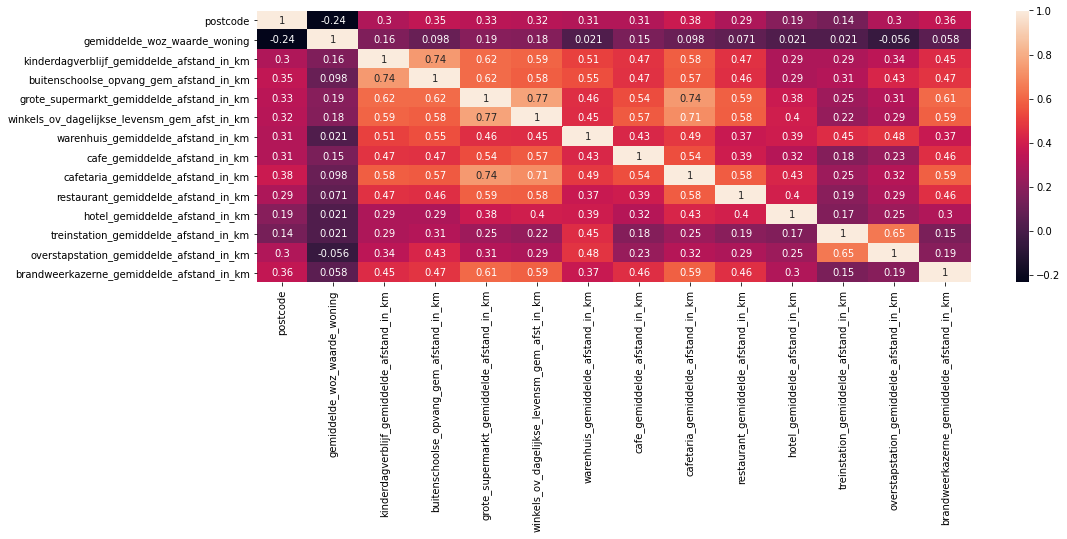

In [246]:
corr = df_recreatie_gemiddele_afstanden.corr()
#corr
plt.figure(figsize = (16,5))
sb.heatmap(corr, annot=True)

# lineare regressie